# Course Description

`Mixture modeling` is a way of representing populations when we are interested in their `heterogeneity`. 
Mixture models use familiar probability distributions (e.g. Gaussian, Poisson, Binomial) to provide a convenient yet formal statistical framework for clustering and classification. Unlike standard clustering approaches, we can estimate the probability of belonging to a cluster and make inference about the sub-populations. For example, in the context of marketing, you may want to cluster different customer groups and find their respective probabilities of purchasing specific products to better target them with custom promotions. When applying natural language processing to a large set of documents, you may want to cluster documents into different topics and understand how important each topic is across each document. In this course, you will learn what Mixture Models are, how they are estimated, and when it is appropriate to apply them!

Víctor Medina

Researcher at the Superintendency of Banks and Financial Institutions

Victor is a doctoral researcher at the University of Edinburgh. With a background in Finance, he has worked researching and developing predictive risk models and mathematical tools for the Chilean Financial System. With a passion for teaching, he was a professor of Econometrics at the Universidad de Chile and works with the School of Political Sciences at Universidad Central to create applications to extract and analyze data from social media. Victor holds a Master of Science in Statistics and R is his second language

In [1]:
# This sets plot images to a nice size.
options(repr.plot.width = 4, repr.plot.height = 4)

# Loading in the ggplot2 package
library(ggplot2)
library(dplyr)

Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'dplyr' was built under R version 3.4.4"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# 1. Introduction to Mixture Models 

## Introduction to model-based clustering - Video

In this chapter, you will be introduced to fundamental concepts in model-based clustering and how this approach differs from other clustering techniques. You will learn the generating process of Gaussian Mixture Models as well as how to visualize the clusters.

### Clustering approaches
Remember that clustering is the procedure of partitioning a collection of observations into a set of meaningful subclasses. But there are many approaches to perform clustering and the choice will depend on the problem. Which of the following statements is FALSE?

ANSWER THE QUESTION
Possible Answers
  1. Kmeans identifies the centers of the clusters and assigns each observation to the closest one.
  2. Mixture models are built under a probabilistic framework, which means they can provide a level of certainty of belonging to a cluster.
  3. Hierarchical techniques give us the number of optimal clusters. (Correct)


Exactly! In fact, The name refers to the type of structure where the lowest level corresponds to a cluster by each observation, and the highest, to a single big cluster.

In [3]:
#write.csv(gender_with_probs, "gender_with_probs.csv", row.names=FALSE)

### Explore gender data
The data `gender` contains the `Weight`, the `Height` and the `BMI` indices of 10,000 people. The original data has a `Gender` label for 5,000 people that identify themselves as females and the other 5,000 as males. The labels will be useful later for testing how well the clustering performs against the real labels. However, in this subset of the dataset, the labels are not provided.

The data `gender_with_probs` also contains the probabilities of each data point belonging to a cluster. Since we are interested in two clusters, probabilities near 1 refer to one cluster and near 0 to the other.

The aim of this exercise is to have a glance at how a typical clustering dataset looks like before and after clustering.

INSTRUCTIONS
100 XP
 - Use the function head to look at the first 6 observations of gender.
 - Use the function head to look at the first 6 observations of gender_with_probs.
 - Make a scatterplot with Weight in the x-axis and BMI in the y-axis. Colour the dots by their probability.

In [12]:
#Load Data
gender = read.csv("gender.csv")
gender_with_probs = read.csv("gender_with_probs.csv")

Gender,Height,Weight,BMI,probability
Male,73.84702,241.8936,0.04435662,5.778312e-06
Male,68.78190,162.3105,0.03430822,6.059525e-01
Male,74.11011,212.7409,0.03873433,2.625952e-05
Male,71.73098,220.0425,0.04276545,3.628734e-04
Male,69.88180,206.3498,0.04225479,4.611901e-03
Male,67.25302,152.2122,0.03365316,9.110687e-01


Height,Weight,BMI,probability
73.84702,241.8936,31.18576,5.099970e-06
68.78190,162.3105,24.12104,5.982902e-01
74.11011,212.7409,27.23291,2.456882e-05
71.73098,220.0425,30.06706,3.355429e-04
69.88180,206.3498,29.70803,4.353371e-03
67.25302,152.2122,23.66049,9.082633e-01


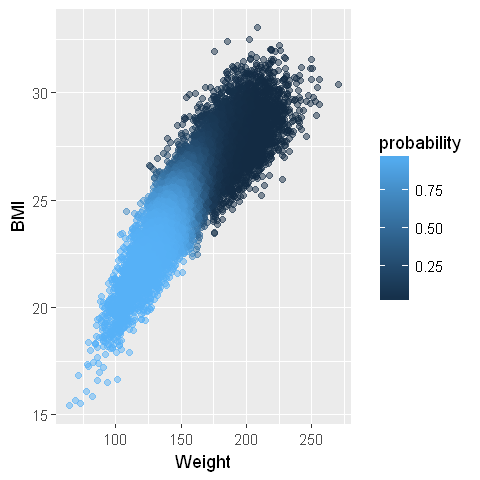

In [15]:
# Have a look to gender (before clustering)
head(gender)

# Have a look to gender_with_probs (after clustering)
head(gender_with_probs)

# Scatterplot with probabilities
gender_with_probs %>% 
  ggplot(aes(x = Weight, y = BMI, col = probability))+
  geom_point(alpha = 0.5)

Excellent! Did you notice how the probabilities reflect the uncertainty in the middle?

## Gaussian distribution - Video 2

### Sampling a Gaussian distribution
When we face a problem where we are provided with samples from probability distributions and we want to recover their parameters, we need to estimate them. When the samples come from only one distribution, the estimation is usually straightforward.

Gaussian distributions are really useful in understanding the main properties of probability distributions. In this exercise, you will learn (1) how to create a sample from this distribution, (2) how to estimate its parameters if you were only provided with the data and (3) how to visualize the estimated distribution.

#### INSTRUCTIONS 1/3
1. Simulate 500 samples from a Gaussian distribution with a mean of 5 and a standard deviation of 4 using the function rnorm(). Save the results into the object simulation.
Check the first six values with head()


In [17]:
# Set seed
set.seed(1313)

# Simulate a Gaussian distribution
simulation <- rnorm(n = 500, mean = 5, sd = 4)

# Check first six values
head(simulation)

[1] 9.757423 7.205539 6.414537 2.184117 5.473702 3.305239

#### INSTRUCTIONS 2/3

Create `mean_estimate` and `standard_deviation_estimate` which correspond to the estimates for the mean and standard deviation of `simulation`, respectively.


In [18]:
# Estimation of the mean
mean_estimate <- mean(simulation)
mean_estimate

# Estimation of the standard deviation
standard_deviation_estimate <- sd(simulation)
standard_deviation_estimate

[1] 4.966197

[1] 3.876194

#### INSTRUCTIONS 3/3
Transform the `simulation` object to a data frame using the function `data.frame` and name the variable as x.
Then plot the histogram and the curve given by the estimates.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


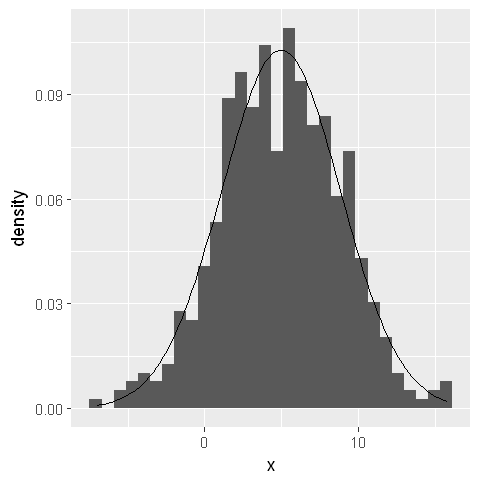

In [19]:
# Transform the results to a data frame
simulation <- data.frame(x = simulation)

# Plot the sample with the estimated curve
ggplot(simulation) + geom_histogram(aes(x = x, y = ..density..)) + 
  stat_function(geom = "line", fun = dnorm,
                args = list(mean = mean_estimate, 
                sd = standard_deviation_estimate))

Good work! The normal or Gaussian distribution is just one of the many distributions implemented in R. You can type `?Distributions` to check the others.

### (not so good) Estimations of the mean and sd
Using the data gender again and assuming that the variable Weight follows a Gaussian distribution, we can estimate the mean and the standard deviation following the previous estimation procedure. The idea is to realize that this procedure does not always work because the data can be formed by more than one distribution.

#### INSTRUCTIONS 1/2

 - Estimate the mean of Weight and save the result into the object mean_estimate. To pull out the variable, you can use the dplyr function pull.
 - Estimate the standard deviation of Weight and save the result in sd_estimate.

In [20]:
# Estimation of the mean
mean_estimate <- gender %>% 
  pull(Weight) %>% 
  mean()
mean_estimate
# Estimation of the standard deviation
sd_estimate <- gender %>% 
  pull(Weight) %>% 
  sd()
sd_estimate

[1] 161.4404

[1] 32.10844

#### INSTRUCTIONS 2/2

Plot the density histogram of `Weight`, adding the estimated curve with the function `stat_function`. Remember that you have stored the mean and the standard deviation into mean_estimate and sd_estimate, respectively.

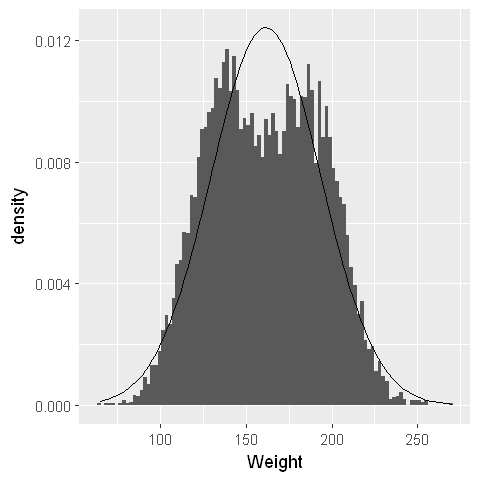

In [21]:
# Plot the sample with the estimated curve
gender %>% 
  ggplot() + geom_histogram(aes(x = Weight, y = ..density..), bins = 100) + 
  stat_function(geom = "line", fun = dnorm,
                args = list(mean = mean_estimate, sd = sd_estimate))

Excellent work! It appears to be two different Gaussian distributions, but we are treating them as one!

### Gaussian mixture models (GMM) - Video 3

### Simulate a mixture of two Gaussian distributions
Mixture models can be very difficult to understand, so let's start by simulating a simple mixture model, and then we will advance from there. In this exercise, you will create a Gaussian Mixture Model with two components.

INSTRUCTIONS
100 XP
 - Simulate 500 samples from a binary variable using `sample()` with a probability of 0.8 for the value 1 and save the results into the object coin.
 - Then, create a vector `mixture` which samples from two different Gaussian distributions depending on the values of `coin` in the following way:
     - When the values of coin are 1, sample from a normal distribution with a mean of 5 and sd of 2.
     - Otherwise, sample from a standard normal distribution.

In [23]:
# Create coin object
coin <- sample(c(0,1), size = 500, 
               replace = TRUE, prob = c(0.2, 0.8))

# Sample from two different Gaussian distributions
mixture <- ifelse(coin == 1, rnorm(n = 500, mean = 5, sd = 2), 
                  rnorm(n = 500))

# Check the first elements
head(mixture)

[1] 3.224892 5.545566 4.466847 4.930156 3.917005 1.687274

Good job! Let's plot the simulated mixture to visualize the two distributions.

### Plot histogram of Gaussian Mixture
We can use histograms to get a general overview of the distribution of a mixture model. From a histogram, we may be able to infer how many components it might have and if the distributional assumptions are suitable.

INSTRUCTIONS

 - Using `ggplot()`, create the histogram for the simulated data `mixture`. To do so, first, transform the `mixture` into a data frame that has a variable x.
 - Then, using the function `geom_histogram()`, specify that the y axis should be the density and the number of bins is 50.

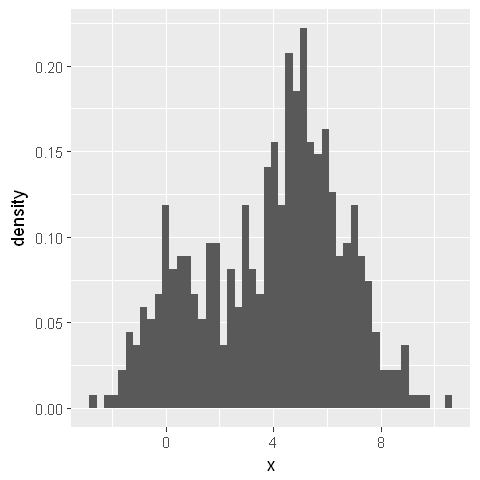

In [24]:
# Transform into a data frame
mixture <- data.frame(x = mixture)

# Create histogram especifiying that is a density plot
mixture %>% 
  ggplot() + geom_histogram(aes(x = x, y = ..density..), bins = 50)

Great job! Can you notice both distributions? One is around 0 and the other around 5.

### Mixture of three Gaussian distributions
What will change if we incorporate another distribution into our simulation? You will see that increasing the number of components will spread the mass density to include the extra distribution, but the logic still follows from the previous exercise.

INSTRUCTIONS
100 XP
 - Create `assignments`, which takes the values 0, 1 and 2 with a probability of 0.3, 0.4 and 0.3, respectively.
 - The data frame `mixture` samples from a Gaussian with a `mean` of 5 and `sd`of 2, when `assignments` is 1. If `assignments` is 2, the `mean` is 10 and sd is 1. Otherwise, is a standard normal distribution.
 - Plot the histogram with 50 bins.

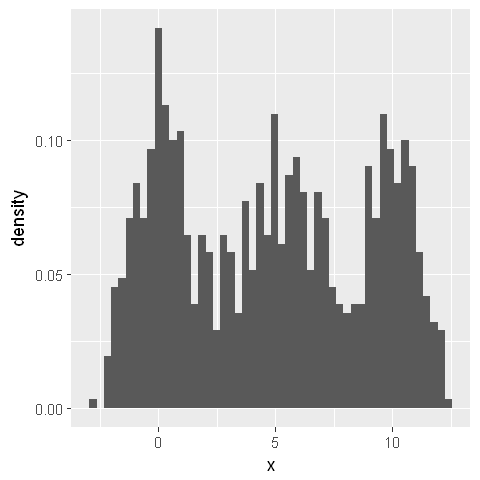

In [25]:
number_observations <- 1000

# Create the assignment object
assignments <- sample(
	c(0,1,2), size = number_observations, replace = TRUE, prob = c(0.3, 0.4, 0.3)
)

# Simulate the GMM with 3 distributions
mixture <- data.frame(
	x = ifelse(assignments == 1, rnorm(n = number_observations, mean = 5, sd = 2), ifelse(assignments == 2, rnorm(n = number_observations, mean = 10, sd = 1), rnorm(n = number_observations)))
)

# Plot the mixture
mixture %>% 
  ggplot() + geom_histogram(aes(x = x, y = ..density..), bins = 50)

Excellent job! You now know how to simulate samples from Gaussian distributions and create Gaussian mixture models. Let's now generalize the concept of mixture models.

# 2. Structure of Mixture Models and Parameters Estimation

Which probability distribution?
Imagine you work for a company that has M different products and N clients. You have been provided by a matrix where each row represents a client and each column, a product. The elements of this matrix are the quantity of the corresponding product bought last year by the client. If you are asked to find clusters of clients, which distribution would you use?

Answer the question
50 XP
Possible Answers
Gaussian
press 1
Binomial
press 2
Poisson (Correct)
press 3


### Handwritten digits dataset
The handwritten digits dataset has around 160 records for each digit ranging from 0 to 9. Each record is formed by 256 columns that takes the value 0 or 1, representing an image of 16x16 pixels.

Later in the course, you will use this data to identify the clusters that can explain the digits using flexmix. Now, the aim is to get familiar with datasets that can be modeled with mixture models using Bernoulli distribution.

The object data has the observations of only two digits from the original dataset.

Instructions
100 XP
Instructions
100 XP
Use glance() to check the dimension of the data frame.
Use glimpse() to check the data. This is a handy function to check every column, especially when there are many.
Use the function show_digit() to parse the rows 50 and 100 into an image.

In [18]:
library(readr)
data = read.csv("digits.csv")[1:316,1:256]
dim(data)

[1] 316 256

In [19]:
library(broom)

show_digit = function(arr256, col=gray(4:1/4), ...) {
  arr256 <- as.numeric(arr256)
  image(matrix(arr256, nrow=16)[,16:1],col=col,...)
}

Warning message:
"'glance.data.frame' is deprecated.
See help("Deprecated")"

nrow,ncol,complete.obs,na.fraction
316,256,316,0


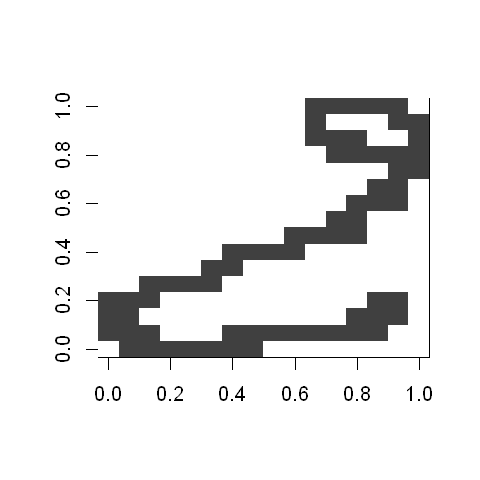

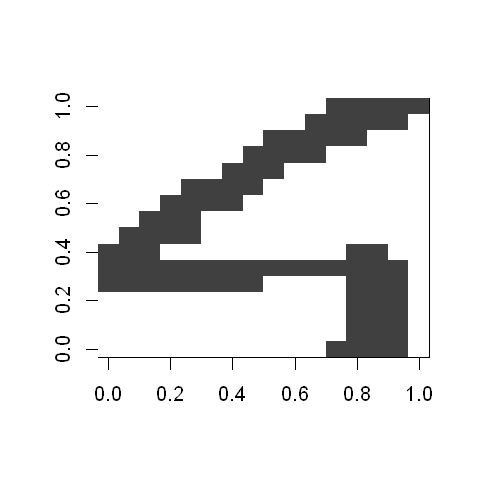

In [21]:
# Dimension
glance(data)

# Apply `glimpse` to the data
# glimpse(data)

# Digit in row 50
show_digit(data[50,])

# Digit in row 100
show_digit(data[100,])

In [22]:
k = kmeans(data,4)

In [23]:
attributes(k)

$names
[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

$class
[1] "kmeans"

In [24]:
k$cluster

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  4   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   1   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  3   4   4   3   4   4   3   4   3   3   4   3   4   4   3   3   3   3   3   3 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  3   4   3   4   4   4   4   3   4   3   4   4   4   3   4   4   4   4   3   4 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   1   1   1   1   3   1   1   1   1   1   1   1   1   1   1   3   1   1   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  2   2   3   3   2   2   2   2   2   2   2   4   2   2   2   2   2   2   3   2 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  1   1   4   1   4   4   4   1   4   1   1   4   4   1   4   1   4   1   4   4 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  2   2   2   2   4   4   4   1   2   2   2   2   2   2   2   2   2   1   2   4 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  4   4   3   4   4   4   4   4   4   4   4   4   3   4   4   4   4   1   4   4 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  4   2   4   4   3   1   4   1   4   4   2   3   3   1   3   1   4   1   1   3 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  1   3   1   4   3   3   1   3   3   3   1   3   1   1   3   1   3   1   4   2 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   3 
221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 
  3   4   3   3   3   3   3   3   3   3   3   3   3   3   3   4   3   3   3   3 
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 
  4   4   4   3   2   4   4   4   3   4   4   4   3   4   4   4   4   4   4   1 
261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 
  1   1   1   1   4   1   1   1   1   1   1   4   1   1   1   1   1   1   1   2 
281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 
  2   3   2   2   4   4   2   2   2   3   2   3   2   3   2   3   3   2   2   4 
301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 
  1   1   4   4   4   1   1   4   4   1   4   4   1   4   1   4

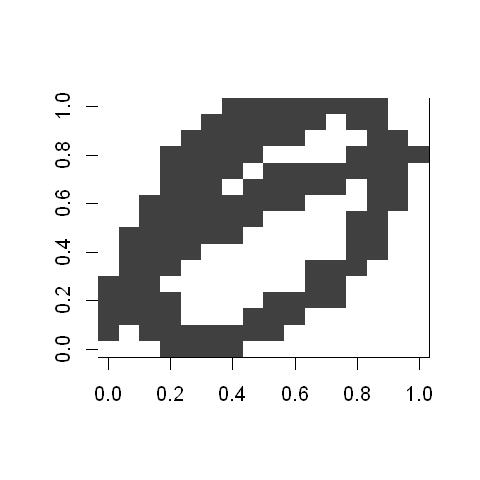

In [25]:
show_digit(data[1,])

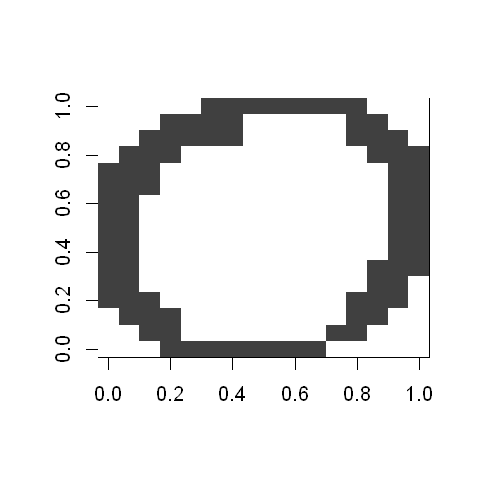

In [27]:
show_digit(data[2,])

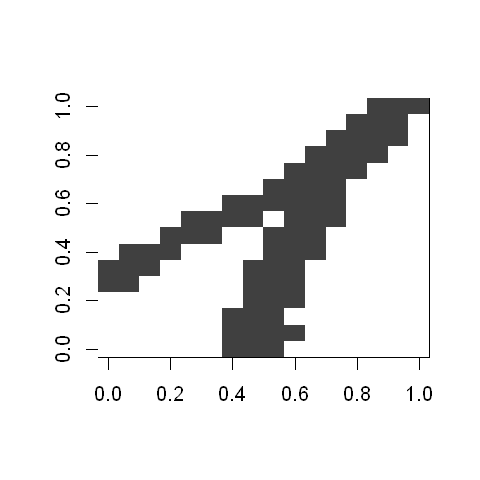

In [26]:
show_digit(data[22,])